In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv
d = pd.read_csv('loan.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
d.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
d.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#Removed unwanted columns that do not contribute to our analysis
data = d[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','grade','sub_grade','annual_inc','purpose','dti','emp_length','last_pymnt_d','home_ownership','verification_status','loan_status']]

In [6]:
data.shape

(39717, 15)

In [7]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'annual_inc', 'purpose', 'dti', 'emp_length',
       'last_pymnt_d', 'home_ownership', 'verification_status', 'loan_status'],
      dtype='object')

In [8]:
#Checking columns with null values
data.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
annual_inc                0
purpose                   0
dti                       0
emp_length             1075
last_pymnt_d             71
home_ownership            0
verification_status       0
loan_status               0
dtype: int64

In [9]:
data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [10]:
#Removing '+','<','years','year' from the substring so that we can get only numbers in emp_length column
data['emp_length'] = data['emp_length'].str.replace(' years','').str.replace(' year','').str.replace('+','').str.replace('< ','')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [12]:
#Convert emp_length from string to number
pd.to_numeric(data['emp_length'])

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

In [13]:
#Fill null values with median in emp_length column
data['emp_length'].fillna('median', inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
data['emp_length'].value_counts()

10        8879
1         7823
2         4388
3         4095
4         3436
5         3282
6         2229
7         1773
8         1479
9         1258
median    1075
Name: emp_length, dtype: int64

In [15]:
data.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
annual_inc              0
purpose                 0
dti                     0
emp_length              0
last_pymnt_d           71
home_ownership          0
verification_status     0
loan_status             0
dtype: int64

In [16]:
#remove rows with null values
data.dropna(inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
data.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
grade                  0
sub_grade              0
annual_inc             0
purpose                0
dti                    0
emp_length             0
last_pymnt_d           0
home_ownership         0
verification_status    0
loan_status            0
dtype: int64

In [18]:
data['emp_length'].value_counts()

10        8870
1         7804
2         4382
3         4088
4         3428
5         3273
6         2228
7         1772
8         1476
9         1255
median    1070
Name: emp_length, dtype: int64

In [19]:
#removing ' months' from term and '%' from int_rate
data['term'] = data['term'].str.replace(' months','')
data['int_rate'] = data['int_rate'].str.replace('%','')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#segregate month and year from last_payment_d
data['last_pymnt_month'] = data['last_pymnt_d'].str.split('-').str[0]
data['last_pymnt_year'] = data['last_pymnt_d'].str.split('-').str[1]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
'''
'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'annual_inc', 'dti', 'emp_length' - Quantitative
'grade', 'sub_grade', 'loan_status', 'last_pymnt_year', 'last_pymnt_month' - Ordered Categroical
'purpose', 'home_ownership', 'verification_status','loan_status' - Unordered Categorical
'''
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'annual_inc', 'purpose', 'dti', 'emp_length',
       'last_pymnt_d', 'home_ownership', 'verification_status', 'loan_status',
       'last_pymnt_month', 'last_pymnt_year'],
      dtype='object')

In [22]:
#remove outliers from loan amount
q1 = np.percentile(data.loan_amnt, 25)
q3 = np.percentile(data.loan_amnt, 75)
iqr = q3 - q1
data['loan_amnt'] = data['loan_amnt'][~((data['loan_amnt'] < (q1 - 1.5 * iqr)) | (data['loan_amnt'] > (q3 + 1.5 * iqr)))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
data['loan_amnt'].describe()

count    38418.000000
mean     10526.986048
std       6439.693370
min        500.000000
25%       5175.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64

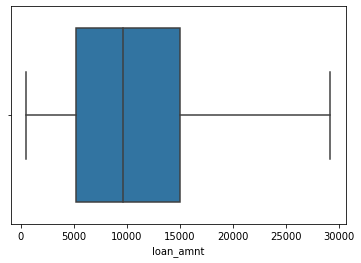

In [24]:
sns.boxplot(x=data['loan_amnt'])

In [25]:
#remove outliers from funded_amnt
q1 = np.percentile(data.funded_amnt, 25)
q3 = np.percentile(data.funded_amnt, 75)
iqr = q3 - q1
data['funded_amnt'] = data['funded_amnt'][~((data['funded_amnt'] < (q1 - 1.5 * iqr)) | (data['funded_amnt'] > (q3 + 1.5 * iqr)))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
data['funded_amnt'].describe()

count    38610.000000
mean     10361.688682
std       6286.046540
min        500.000000
25%       5100.000000
50%       9375.000000
75%      14500.000000
max      29375.000000
Name: funded_amnt, dtype: float64

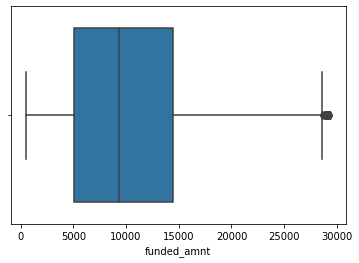

In [27]:
sns.boxplot(x=data['funded_amnt'])

In [28]:
#remove outliers from funded_amnt
q1 = np.percentile(data.funded_amnt_inv, 25)
q3 = np.percentile(data.funded_amnt_inv, 75)
iqr = q3 - q1
data['funded_amnt_inv'] = data['funded_amnt_inv'][~((data['funded_amnt_inv'] < (q1 - 1.5 * iqr)) | (data['funded_amnt_inv'] > (q3 + 1.5 * iqr)))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
data['funded_amnt_inv'].describe()

count    38647.000000
mean      9829.385386
std       6236.690820
min          0.000000
25%       5000.000000
50%       8550.000000
75%      13900.000000
max      28500.000000
Name: funded_amnt_inv, dtype: float64

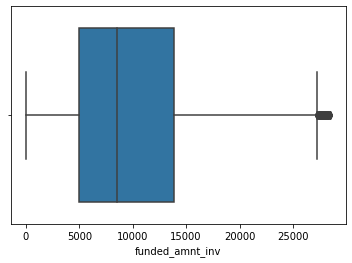

In [30]:
sns.boxplot(x=data['funded_amnt_inv'])

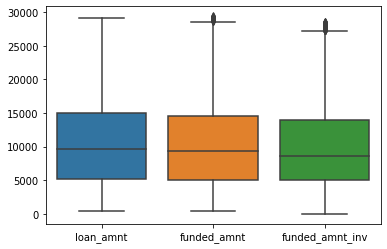

In [31]:
#loan_amnt > funded_amnt > funded_amnt (for q1,median,q3)
sns.boxplot(data=data[['loan_amnt','funded_amnt','funded_amnt']])

In [32]:
#all three have positive correlation between each other
data[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981146,0.928459
funded_amnt,0.981146,1.000000,0.948858
funded_amnt_inv,0.928459,0.948858,1.000000


In [34]:
#remove outliers from int_rate
data['int_rate'] = pd.to_numeric(data['int_rate'])
q1 = np.percentile(data.funded_amnt_inv, 25)
q3 = np.percentile(data.funded_amnt_inv, 75)
iqr = q3 - q1
data['int_rate'] = data['int_rate'][~((data['int_rate'] < (q1 - 1.5 * iqr)) | (data['int_rate'] > (q3 + 1.5 * iqr)))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
data['int_rate'].describe()

count    39646.000000
mean        12.017573
std          3.724709
min          5.420000
25%          9.250000
50%         11.830000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [36]:
'''We can imply from this grouping that the loan amount, funded amount, the funded investor amount, 
interest rate, and their dti is greater for the defaulted people than those who have fully paid the loan
and their annual income less than those who have fully paid.'''
data.groupby('loan_status').mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti
loan_status,,,,,,
Charged Off,11156.013195,10966.540475,10130.740424,13.817709,62638.874917,14.024147
Current,14907.132207,14832.142857,14656.365479,15.031465,75430.665105,14.750009
Fully Paid,10285.810727,10117.569434,9624.461872,11.609761,69862.503328,13.148421


In [37]:
data.groupby('loan_status').median()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti
loan_status,,,,,,
Charged Off,10000.0,10000.0,9000.0,13.57,53000.0,14.32
Current,15000.0,15000.0,14687.5,14.65,65000.0,15.05
Fully Paid,9000.0,9000.0,8350.0,11.49,60000.0,13.20


In [38]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'annual_inc', 'purpose', 'dti', 'emp_length',
       'last_pymnt_d', 'home_ownership', 'verification_status', 'loan_status',
       'last_pymnt_month', 'last_pymnt_year'],
      dtype='object')

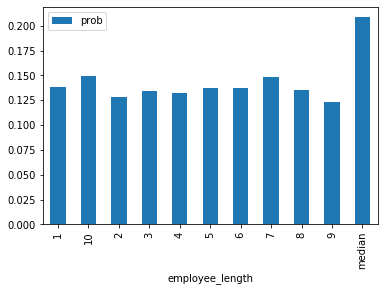

In [39]:
'''Comparing employee length of those who have defaulted and not defaulted, doesn't really show any good separation and 
conclusive result (median won't be considered)'''
total = data['emp_length'].value_counts()
emp = (data[data['loan_status'] == 'Charged Off']['emp_length'].value_counts())/total
emp = pd.DataFrame({'employee_length':emp.index, 'prob':emp.values})
emp.plot.bar(x = 'employee_length', y = 'prob')

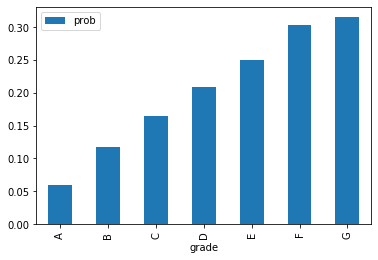

In [48]:
'''People with grades E,F,G are more likely to default as compared to other grades. 31% people with Grade G are likely to default.'''
total = data['grade'].value_counts()
grade = (data[data['loan_status'] == 'Charged Off']['grade'].value_counts())/total
grade = pd.DataFrame({'grade':grade.index, 'prob':grade.values})
grade.plot.bar(x = 'grade', y = 'prob')

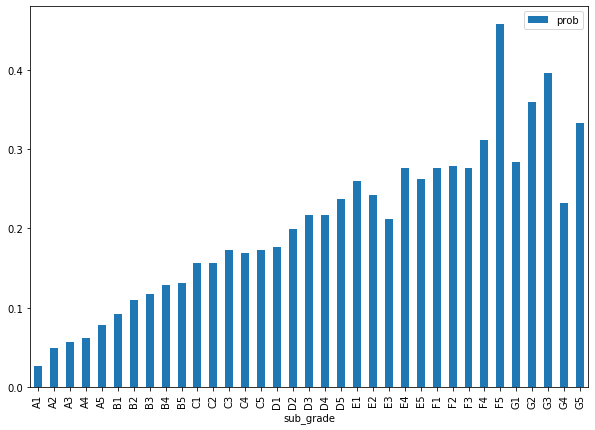

In [52]:
'''Sub Grades - F5, G3, G2 have the most default percentage and therefore more likely to default'''
total = data['sub_grade'].value_counts()
sub = (data[data['loan_status'] == 'Charged Off']['sub_grade'].value_counts())/total
sub = pd.DataFrame({'sub_grade':sub.index, 'prob':sub.values})
sub.plot.bar(x = 'sub_grade', y = 'prob', figsize=(10,7))

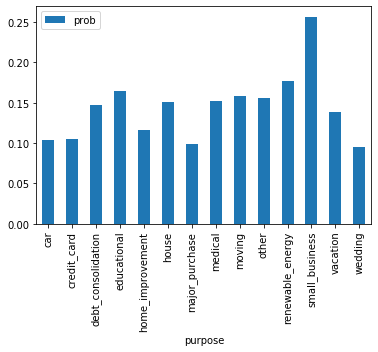

In [53]:
'''People running small businesses are more likely to default with the highest default percentage of 25% 
and major purchases and weddings have the least percentage'''
total = data['purpose'].value_counts()
pur = (data[data['loan_status'] == 'Charged Off']['purpose'].value_counts())/total
pur = pd.DataFrame({'purpose':pur.index, 'prob':pur.values})
pur.plot.bar(x = 'purpose', y = 'prob')

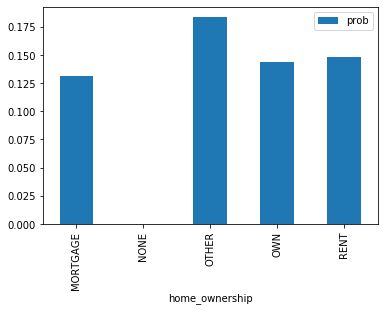

In [54]:
'''Home Ownership category - OTHER has the most default percentage'''
total = data['home_ownership'].value_counts()
hom = (data[data['loan_status'] == 'Charged Off']['home_ownership'].value_counts())/total
hom = pd.DataFrame({'home_ownership':hom.index, 'prob':hom.values})
hom.plot.bar(x = 'home_ownership', y = 'prob')

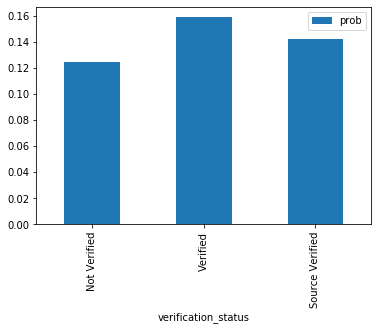

In [55]:
'''No real conclusive evidence here as it shows the Verified status has the maximum default percent which is odd.'''
total = data['verification_status'].value_counts()
ver = (data[data['loan_status'] == 'Charged Off']['verification_status'].value_counts())/total
ver = pd.DataFrame({'verification_status':ver.index, 'prob':ver.values})
ver.plot.bar(x = 'verification_status', y = 'prob')

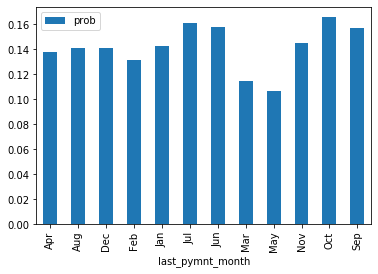

In [56]:
'''More than 16% people who paid last in the month of Oct have defaulted.'''
total = data['last_pymnt_month'].value_counts()
lpm = (data[data['loan_status'] == 'Charged Off']['last_pymnt_month'].value_counts())/total
lpm = pd.DataFrame({'last_pymnt_month':lpm.index, 'prob':lpm.values})
lpm.plot.bar(x = 'last_pymnt_month', y = 'prob')

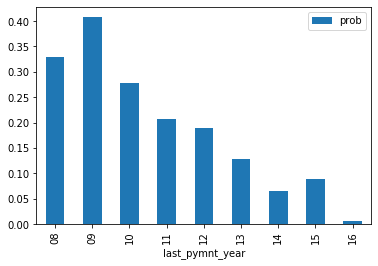

In [57]:
'''Years 2008, 2009 and 2010 has the highest default rates, which is understandable as the World was going
through an economic crisis and therefore has the maximum defaulters.'''
total = data['last_pymnt_year'].value_counts()
lpy = (data[data['loan_status'] == 'Charged Off']['last_pymnt_year'].value_counts())/total
lpy = pd.DataFrame({'last_pymnt_year':lpy.index, 'prob':lpy.values})
lpy.plot.bar(x = 'last_pymnt_year', y = 'prob')